<a href="https://colab.research.google.com/github/SnigdhaPanakanti/Snigdha_DATA690/blob/main/Assignment_05/Part_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment - 05**

## PART - 06: Data Cleaning

## **Handling Missing Data with Pandas**


- Pandas borrows all the capabilities from numpy selection + adds a number of convenient methods to handle missing values. 

In [1]:
import numpy as np
import pandas as pd

### Pandas utility functions:

In [2]:
pd.isnull(np.nan)

True

In [3]:
pd.isnull(None)

True

In [4]:
pd.isna(np.nan)

True

In [5]:
pd.isna(None)

True

The opposite ones also exist:

In [6]:
pd.notnull(None)

False

In [7]:
pd.notnull(np.nan)

False

In [8]:
pd.notna(np.nan)

False

In [9]:
pd.notnull(3)

True

These functions also work with Series and DataFrames:

In [10]:
pd.isnull(pd.Series([1, np.nan, 7]))

0    False
1     True
2    False
dtype: bool

In [11]:
pd.notnull(pd.Series([1, np.nan, 7]))

0     True
1    False
2     True
dtype: bool

In [12]:
pd.isnull(pd.DataFrame({
    'Column A': [1, np.nan, 7],
    'Column B': [np.nan, 2, 3],
    'Column C': [np.nan, 2, np.nan]
}))

,Column A,Column B,Column C
0,False,True,True
1,True,False,False
2,False,False,True


### Pandas Operations with Missing Values

- Pandas manages missing values more gracefully than numpy. nans will no longer behave as "viruses", and operations will just ignore them completely.

In [13]:
pd.Series([1, 2, np.nan]).count()

2

In [14]:
pd.Series([1, 2, np.nan]).sum()

3.0

In [15]:
pd.Series([2, 2, np.nan]).mean()

2.0

### Filtering missing data

- As we saw with numpy, we could combine boolean selection + pd.isnull to filter out those nans and null values.

In [16]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])

In [17]:
pd.notnull(s)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [18]:
pd.isnull(s)

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [19]:
pd.notnull(s).sum()

4

In [20]:
pd.isnull(s).sum()

2

In [21]:
s[pd.notnull(s)]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

But both notnull and isnull are also methods of Series and DataFrames, so we could use it this way:


In [22]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [23]:
s.notnull()

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [24]:
s[s.notnull()]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

### Dropping null values

- Boolean selection + notnull() seems a little bit verbose and repetitive.
- Any repetitive task will probably have a better, more DRY way. In this case, we can use the 'dropna' method

In [25]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [26]:
s.dropna()

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

### Dropping null values on DataFrames



In [27]:
df = pd.DataFrame({
    'Column A': [1, np.nan, 30, np.nan],
    'Column B': [2, 8, 31, np.nan],
    'Column C': [np.nan, 9, 32, 100],
    'Column D': [5, 8, 34, 110],
})

In [28]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [29]:
df.shape

(4, 4)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column A  2 non-null      float64
 1   Column B  3 non-null      float64
 2   Column C  3 non-null      float64
 3   Column D  4 non-null      int64  
dtypes: float64(3), int64(1)
memory usage: 256.0 bytes


In [31]:
df.isnull()

,Column A,Column B,Column C,Column D
0,False,False,True,False
1,True,False,False,False
2,False,False,False,False
3,True,True,False,False


In [32]:
df.isnull().sum()

Column A    2
Column B    1
Column C    1
Column D    0
dtype: int64

The default dropna behavior will drop all the rows in which any null value is present.

In [33]:
df.dropna()

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


Rows containing null values are dropped from the DF. We can use 'axis' parameter to drop columns containing null values:

In [34]:
df.dropna(axis=1)

,Column D
0,5
1,8
2,34
3,110


- In this case, any row or column that contains at least one null value will be dropped. Which can be, depending on the case, too extreme. You can control this behavior with the how parameter. Can be either 'any' or 'all'

In [35]:
df2 = pd.DataFrame({
    'Column A': [1, np.nan, 30],
    'Column B': [2, np.nan, 31],
    'Column C': [np.nan, np.nan, 100]
})

In [36]:
df2

,Column A,Column B,Column C
0,1.0,2.0,NaN
1,NaN,NaN,NaN
2,30.0,31.0,100.0


In [37]:
df.dropna(how='all')

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [38]:
df.dropna(how='any')

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


- We can also use the 'thresh' parameter to indicate a threshold (a minimum number) of non-null values for the row/column to be kept.

In [39]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [40]:
df.dropna(thresh=3)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34


In [41]:
df.dropna(thresh=3, axis='columns')

,Column B,Column C,Column D
0,2.0,NaN,5
1,8.0,9.0,8
2,31.0,32.0,34
3,NaN,100.0,110


### Filling null values

- Sometimes instead than dropping the null values, we might need to replace them with some other value which highly depends on your context and the dataset you're currently working. 
- Sometimes a 'nan' can be replaced with a 0, sometimes it can be replaced with the mean of the sample, and some other times you can take the closest value which again depends on the context.

In [42]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [43]:
s.fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    0.0
5    4.0
dtype: float64

In [44]:
s.fillna(s.mean())

0    1.0
1    2.0
2    3.0
3    2.5
4    2.5
5    4.0
dtype: float64

In [45]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

- Filling nulls with contiguous (close) values

   - The 'method' argument is used to fill null values with other values close to that null one.

In [46]:
s.fillna(method='ffill')

0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [47]:
s.fillna(method='bfill')

0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    4.0
dtype: float64

In [48]:
pd.Series([np.nan, 3, np.nan, 9]).fillna(method='ffill')

0    NaN
1    3.0
2    3.0
3    9.0
dtype: float64

In [49]:
pd.Series([1, np.nan, 3, np.nan, np.nan]).fillna(method='bfill')

0    1.0
1    3.0
2    3.0
3    NaN
4    NaN
dtype: float64

### Filling null values on DataFrames

- The 'fillna' method also works on DataFrames, and it works similarly. 
- The main differences are that you can specify the axis to use to fill the values and that you have more control on the values passed.

In [50]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [51]:
df.fillna({'Column A': 0, 'Column B': 99, 'Column C': df['Column C'].mean()})

,Column A,Column B,Column C,Column D
0,1.0,2.0,47.0,5
1,0.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,0.0,99.0,100.0,110


In [52]:
df.fillna(method='ffill', axis=0)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,1.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,30.0,31.0,100.0,110


In [53]:
df.fillna(method='ffill', axis=1)

,Column A,Column B,Column C,Column D
0,1.0,2.0,2.0,5.0
1,NaN,8.0,9.0,8.0
2,30.0,31.0,32.0,34.0
3,NaN,NaN,100.0,110.0


### Checking if there are NAs

- Does this Series or DataFrame contain any missing value? The answer should be yes or no: True or False. How can you verify it?

Example 1: Checking the length

If there are missing values, s.dropna() will have less elements than s:

In [54]:
s.dropna().count()

4

In [55]:
missing_values = len(s.dropna()) != len(s)
missing_values

True

There's also a count method, that excludes nans from its result:

In [56]:
len(s)

6

In [57]:
s.count()

4

In [58]:
missing_values = s.count() != len(s)
missing_values

True

- More Pythonic solution any:

   - The methods 'any' and 'all' check if either there's any True value in a Series or all the values are True. They work in the same way as in Python.

In [59]:
pd.Series([True, False, False]).any()

True

In [60]:
pd.Series([True, False, False]).all()

False

In [61]:
pd.Series([True, True, True]).all()

True

The isnull() method returned a Boolean Series with True values wherever there was a 'nan'.

In [62]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [63]:
# Use the any method with the boolean array returned

pd.Series([1, np.nan]).isnull().any()

True

In [64]:
pd.Series([1, 2]).isnull().any()

False

In [65]:
s.isnull().any()

True

In [66]:
s.isnull().values

array([False, False, False,  True,  True, False])

In [67]:
s.isnull().values.any()

True

## **Cleaning not-null values**


- After dealing with many datasets I can tell you that "missing data" is not such a big deal. The best thing that can happen is to clearly see values like np.nan. 
- The only thing you need to do is just use methods like 'isnull' and 'fillna'/'dropna' and pandas will take care of the rest.

- But sometimes, you can have invalid values that are not just "missing data" (None, or nan).

In [68]:
import numpy as np
import pandas as pd

In [69]:
df = pd.DataFrame({
    'Sex': ['M', 'F', 'F', 'D', '?'],
    'Age': [29, 30, 24, 290, 25],
})
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


- The previous DataFrame doesn't have any "missing value", but clearly has invalid data. 
- 290 doesn't seem like a valid age, and D and ? don't correspond with any known sex category. 
How can you clean these not-missing, but clearly invalid values then?

### Finding Unique values

- The first step to clean invalid values is to notice them, then identify them and finally handle them appropriately (remove them, replace them, etc). 
- Usually, for a "categorical" type of field (like Sex, which only takes values of a discrete set ('M', 'F')), we start by analyzing the variety of values present. For that, we use the unique() method:

In [70]:
df['Sex'].unique()

array(['M', 'F', 'D', '?'], dtype=object)

In [71]:
df['Sex'].value_counts()

F    2
M    1
D    1
?    1
Name: Sex, dtype: int64

- Clearly if you see values like 'D' or '?', it'll immediately raise your attention. Now, what to do with them? Let's say you picked up the phone, called the survey company and they told you that 'D' was a typo and it should actually be F. You can use the replace function to replace these values.

In [72]:
df['Sex'].replace('D', 'F')

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

It can accept a dictionary of values to replace. For example, they also told you that there might be a few 'N's, that should actually be 'M's:

In [73]:
df['Sex'].replace({'D': 'F', 'N': 'M'})

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

If you have many columns to replace, you could apply it at "DataFrame level"

In [74]:
df.replace({
    'Sex': {
        'D': 'F',
        'N': 'M'
    },
    'Age': {
        290: 29
    }
})

,Sex,Age
0,M,29
1,F,30
2,F,24
3,F,29
4,?,25


In the previous example, I explicitly replaced 290 with 29 (assuming it was just an extra 0 entered at data-entry phase). But what if you'd like to remove all the extra 0s from the ages columns? (example, 150 > 15, 490 > 49).


The first step would be to just set the limit of the "not possible" age. Is it 100? 120? Let's say that anything above 100 isn't credible for our dataset. We can then combine boolean selection with the operation:

In [75]:
df[df['Age'] > 100]

,Sex,Age
3,D,290


In [76]:
# Divide by 10

df.loc[df['Age'] > 100, 'Age'] = df.loc[df['Age'] > 100, 'Age'] / 10

In [77]:
df

,Sex,Age
0,M,29.0
1,F,30.0
2,F,24.0
3,D,29.0
4,?,25.0


### Duplicates

- Checking duplicate values is extremely simple. It'll behave differently between Series and DataFrames.
- Let's start with Series. 
- As an example, let's say we're throwing a fancy party and we're inviting Ambassadors from Europe. But can only invite one ambassador per country. This is our original list, and as you can see, both the UK and Germany have duplicated ambassadors.

In [78]:
ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], index=[
    'Gérard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth '
])

In [79]:
ambassadors

Gérard Araud                  France
Kim Darroch           United Kingdom
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
Peter Ammon                  Germany
Klaus Scharioth              Germany
dtype: object

The two most important methods to deal with duplicates are duplicated (that will tell you which values are duplicates) and drop_duplicates (which will just get rid of duplicates)

In [80]:
ambassadors.duplicated()

Gérard Araud          False
Kim Darroch           False
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig          False
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In this case duplicated didn't consider 'Kim Darroch', the first instance of the United Kingdom or 'Peter Wittig' as duplicates. That's because, by default, it'll consider the first occurrence of the value as not-duplicate. You can change this behavior with the 'keep' parameter:

In [81]:
ambassadors.duplicated(keep='last')

Gérard Araud          False
Kim Darroch            True
Peter Westmacott      False
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth       False
dtype: bool

In this case, the result is "flipped", 'Kim Darroch' and 'Peter Wittig' (the first ambassadors of their countries) are considered duplicates, but 'Peter Westmacott' and 'Klaus Scharioth' are not duplicates. You can also choose to mark all of them as duplicates with keep=False:

In [82]:
ambassadors.duplicated(keep=False)

Gérard Araud          False
Kim Darroch            True
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

A similar method is drop_duplicates, which just excludes the duplicated values and also accepts the keep parameter:

In [83]:
ambassadors.drop_duplicates()

Gérard Araud                  France
Kim Darroch           United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
dtype: object

In [84]:
ambassadors.drop_duplicates(keep='last')

Gérard Araud                  France
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Klaus Scharioth              Germany
dtype: object

In [85]:
ambassadors.drop_duplicates(keep=False)

Gérard Araud          France
Armando Varricchio     Italy
dtype: object

### Duplicates in DataFrames

- Conceptually speaking, duplicates in a DataFrame happen at "row" level. 
- Two rows with exactly the same values are considered to be duplicates.

In [86]:
players = pd.DataFrame({
    'Name': [
        'Kobe Bryant',
        'LeBron James',
        'Kobe Bryant',
        'Carmelo Anthony',
        'Kobe Bryant',
    ],
    'Pos': [
        'SG',
        'SF',
        'SG',
        'SF',
        'SF'
    ]
})

In [87]:
players

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
2,Kobe Bryant,SG
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In the previous DataFrame, we clearly see that Kobe is duplicated; but he appears with two different positions. What does duplicated say?

In [88]:
players.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

Again, conceptually, "duplicated" means "all the column values should be duplicates". We can customize this with the subset parameter:

In [89]:
players.duplicated(subset=['Name'])

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [90]:
players.duplicated(subset=['Name'], keep='last')

0     True
1    False
2     True
3    False
4    False
dtype: bool

'drop_duplicates' takes the same parameters:

In [91]:
players.drop_duplicates()

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [92]:
players.drop_duplicates(subset=['Name'])

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF


In [93]:
players.drop_duplicates(subset=['Name'], keep='last')

,Name,Pos
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


### Text Handling

- Cleaning text values can be incredibly hard. 
- Invalid text values involves, 99% of the time, mistyping, which is completely unpredictable and doesn't follow any pattern. 

### Splitting Columns
- The result of a survey is loaded and this is what you get:

In [94]:
df = pd.DataFrame({
    'Data': [
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_   IT_1',
        '1985_F_I  T_2'
]})
df

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


- Pandas has a convenient method named 'split.'
- The values "year, Sex, Country and number of children" have been grouped in the same column and separated by an underscore. 

In [95]:
df['Data'].str.split('_')

0       [1987, M, US , 1]
1       [1990?, M, UK, 1]
2        [1992, F, US, 2]
3    [1970?, M,    IT, 1]
4      [1985, F, I  T, 2]
Name: Data, dtype: object

In [96]:
df['Data'].str.split('_', expand=True)

,0,1,2,3
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [97]:
df = df['Data'].str.split('_', expand=True)

In [98]:
df.columns = ['Year', 'Sex', 'Country', 'No Children']

In [99]:
df

,Year,Sex,Country,No Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [100]:
# 'contains' method is used to check the given value in the columns

df['Year'].str.contains('\?')

0    False
1     True
2    False
3     True
4    False
Name: Year, dtype: bool

- 'contains' takes a regex/pattern as first value, so we need to escape the ? symbol as it has a special meaning for these patterns. Regular letters don't need escaping.

In [101]:
df['Country'].str.contains('U')

0     True
1     True
2     True
3    False
4    False
Name: Country, dtype: bool

- Removing blank spaces (like in 'US ' or 'I  T' can be achieved with strip (lstrip and rstrip also exist) or just replace.

In [102]:
df['Country'].str.strip()

0      US
1      UK
2      US
3      IT
4    I  T
Name: Country, dtype: object

In [103]:
df['Country'].str.replace(' ', '')

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

- 'replace' and 'contains' take regex patterns, which can make it easier to replace values in bulk:

In [104]:
df['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group('year'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0    1987
1    1990
2    1992
3    1970
4    1985
Name: Year, dtype: object

All are applied over the str attribute of the series. 

## **More Visualizations**

We have seen pandas plotting methods and basic API of matplotlib. Here are more details:

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Global API


- Matplotlib's default pyplot API has a global, MATLAB-style interface, as we've already seen.

In [106]:
x = np.arange(-10, 11)

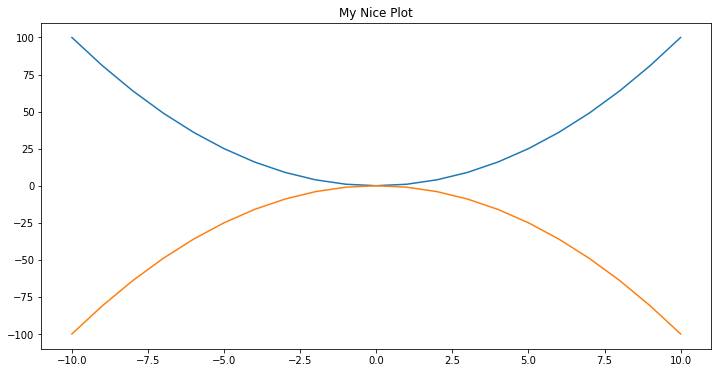

In [107]:
plt.figure(figsize=(12, 6))

plt.title('My Nice Plot')

plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

Text(0, 0.5, 'X Squared')

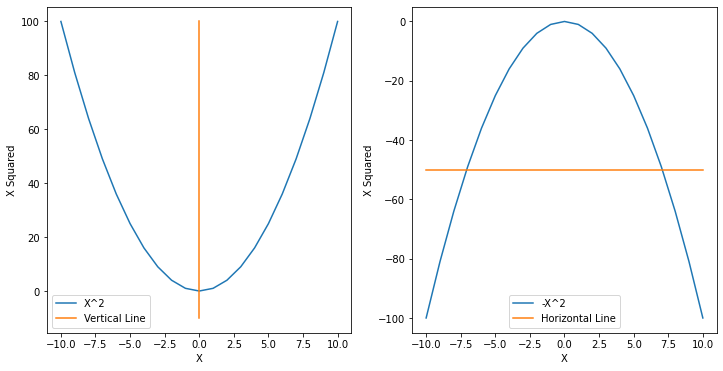

In [108]:
plt.figure(figsize=(12, 6))
plt.title('My Nice Plot')

plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.plot(x, x ** 2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

plt.subplot(1, 2, 2)
plt.plot(x, -1 * (x ** 2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['-X^2', 'Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')

### OOP Interface

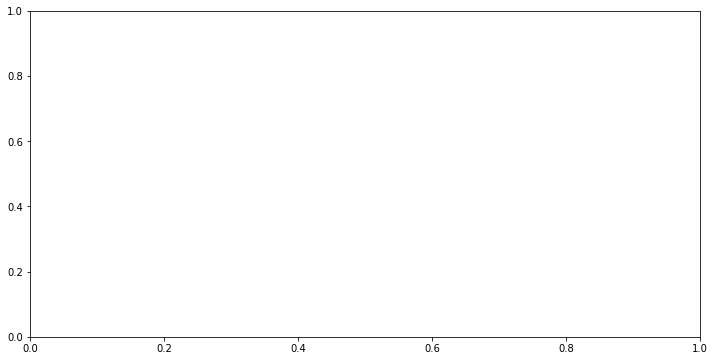

In [109]:
fig, axes = plt.subplots(figsize=(12, 6))

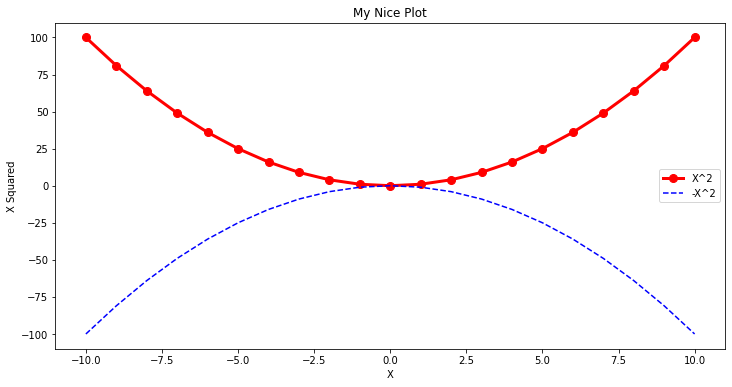

In [110]:
axes.plot(
    x, (x ** 2), color='red', linewidth=3,
    marker='o', markersize=8, label='X^2')

axes.plot(x, -1 * (x ** 2), 'b--', label='-X^2')

axes.set_xlabel('X')
axes.set_ylabel('X Squared')

axes.set_title("My Nice Plot")

axes.legend()

fig

Text(0.5, 1.0, 'My Nice Plot')

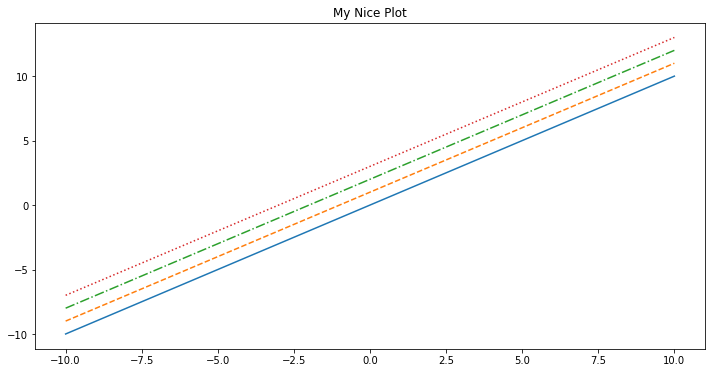

In [111]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, linestyle='solid')
axes.plot(x, x + 1, linestyle='dashed')
axes.plot(x, x + 2, linestyle='dashdot')
axes.plot(x, x + 3, linestyle='dotted');

axes.set_title("My Nice Plot")

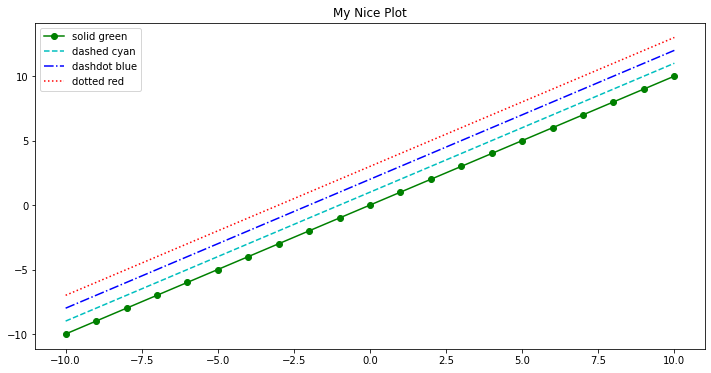

In [112]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, '-og', label="solid green")
axes.plot(x, x + 1, '--c', label="dashed cyan")
axes.plot(x, x + 2, '-.b', label="dashdot blue")
axes.plot(x, x + 3, ':r', label="dotted red")

axes.set_title("My Nice Plot")

axes.legend()

There are a lot of line and marker types.

In [113]:
print('Markers: {}'.format([m for m in plt.Line2D.markers]))

Markers: ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', None, ' ', '']


In [114]:
linestyles = ['_', '-', '--', ':']

print('Line styles: {}'.format(linestyles))

Line styles: ['_', '-', '--', ':']


### Other types of plots

### Figures and subfigures:

- When we call the subplots() function we get a tuple containing a Figure and a axes element.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f82d5970c50>)

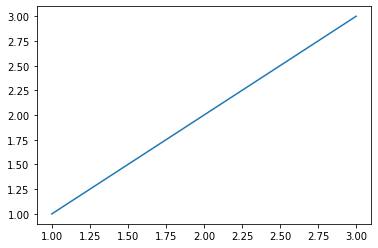

In [115]:
plot_objects = plt.subplots()

fig, ax = plot_objects

ax.plot([1,2,3], [1,2,3])

plot_objects

We can also define how many elements we want inside our figure. To do that we can set the nrows and ncols params.

(<Figure size 1008x432 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82d58d2410>,
       dtype=object))

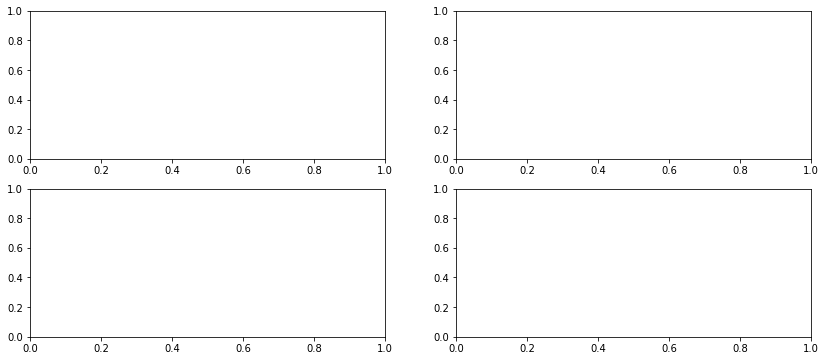

In [116]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

fig, ((ax1, ax2), (ax3, ax4)) = plot_objects

plot_objects

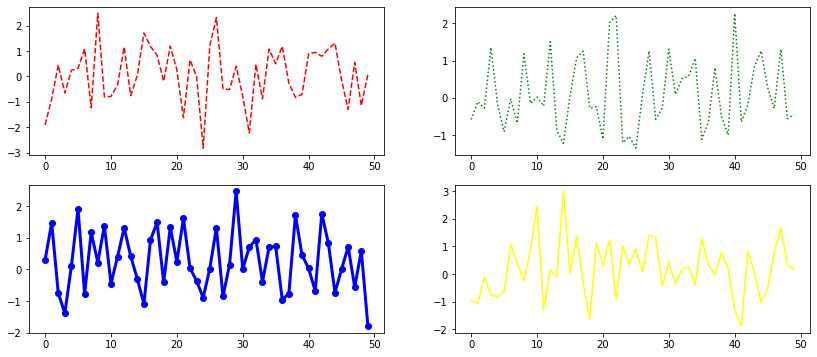

In [117]:
ax4.plot(np.random.randn(50), c='yellow')
ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='green', linestyle=':')
ax3.plot(np.random.randn(50), c='blue', marker='o', linewidth=3.0)


fig

- The subplot2grid command:
   - There is another way to make subplots using a grid-like format:

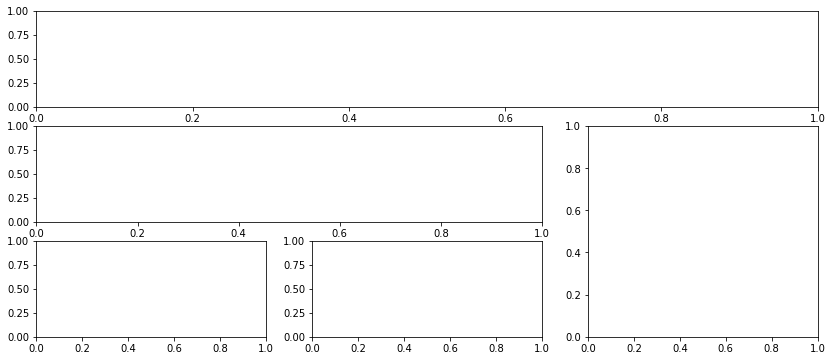

In [118]:
plt.figure(figsize=(14, 6))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))


### Scatter Plot:

In [119]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2  # 0 to 15 point radii

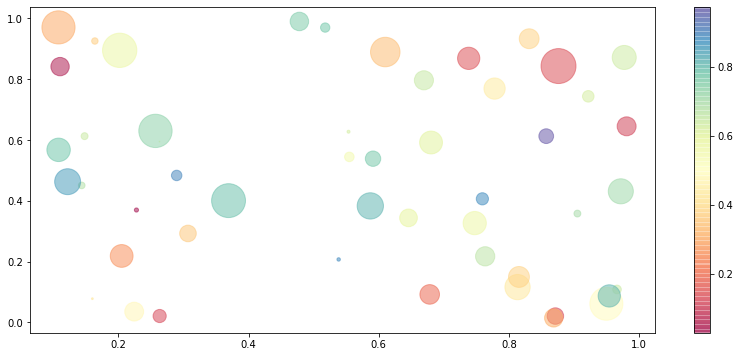

In [120]:
plt.figure(figsize=(14, 6))

plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

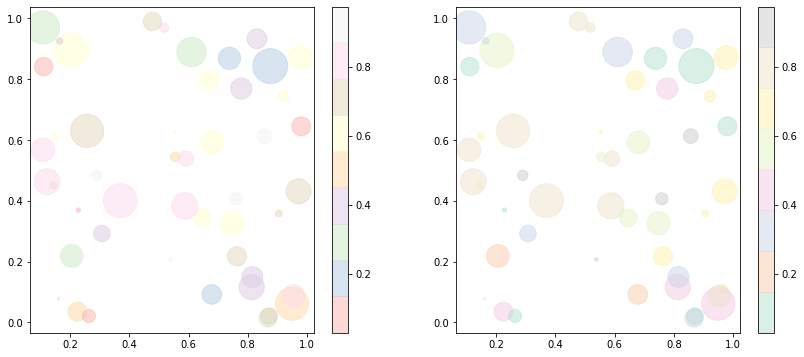

In [121]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1,2,1)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel1')
plt.colorbar()

ax2 = fig.add_subplot(1,2,2)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel2')
plt.colorbar()

plt.show()

### Histograms:

In [122]:
values = np.random.randn(1000)

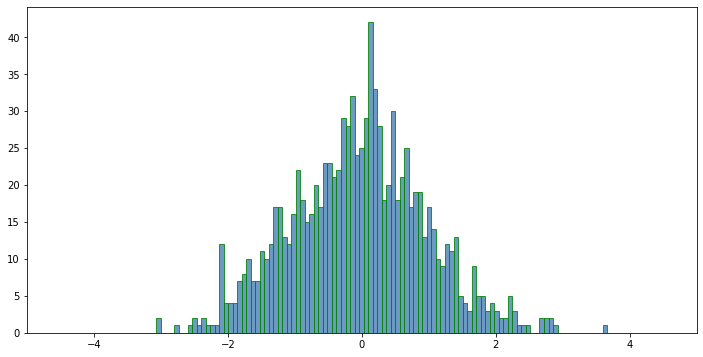

In [123]:
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green')
plt.xlim(xmin=-5, xmax=5)

plt.show()

In [124]:
fig.savefig('hist.png')

### KDE (kernel density estimation)

In [125]:
from scipy import stats

density = stats.kde.gaussian_kde(values)
density

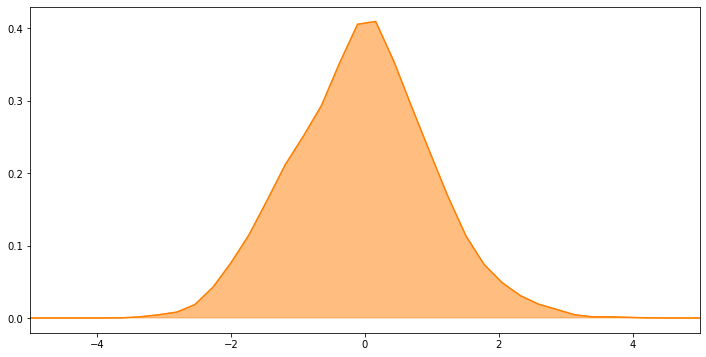

In [126]:
plt.subplots(figsize=(12, 6))

values2 = np.linspace(min(values)-10, max(values)+10, 100)

plt.plot(values2, density(values2), color='#FF7F00')
plt.fill_between(values2, 0, density(values2), alpha=0.5, color='#FF7F00')
plt.xlim(xmin=-5, xmax=5)

plt.show()

### Combine Plots:

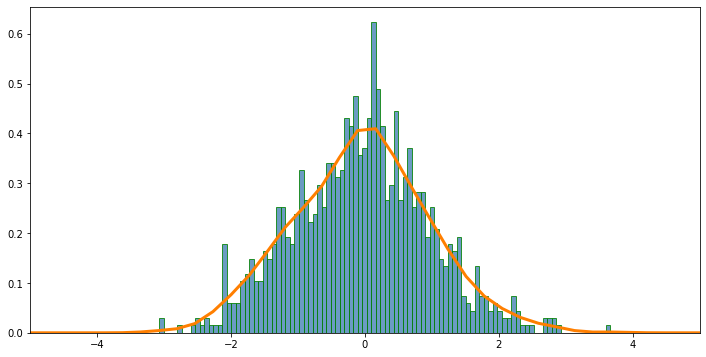

In [127]:
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8, density=1,
          histtype='bar', color='steelblue',
          edgecolor='green')

plt.plot(values2, density(values2), color='#FF7F00', linewidth=3.0)
plt.xlim(xmin=-5, xmax=5)

plt.show()

### Bar Plots:

In [128]:
Y = np.random.rand(1, 5)[0]
Y2 = np.random.rand(1, 5)[0]

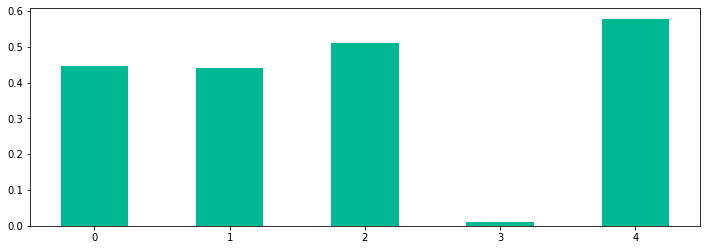

In [129]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894')

plt.show()

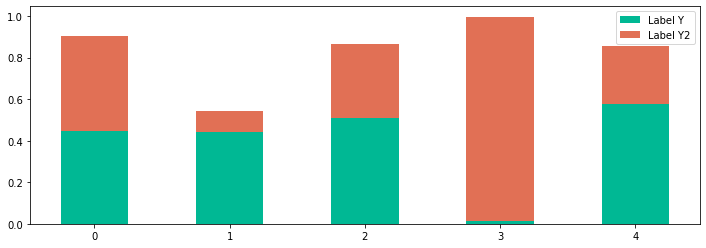

In [130]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894', label='Label Y')
plt.bar(np.arange(len(Y2)), Y2, width=barWidth, color='#e17055', bottom=Y, label='Label Y2')

plt.legend()
plt.show()

### Boxplots and outlier detection

In [131]:
values = np.concatenate([np.random.randn(10), np.array([10, 15, -10, -15])])

(array([1., 1., 0., 0., 6., 4., 0., 0., 1., 1.]),
 array([-15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.,  15.]),
 <a list of 10 Patch objects>)

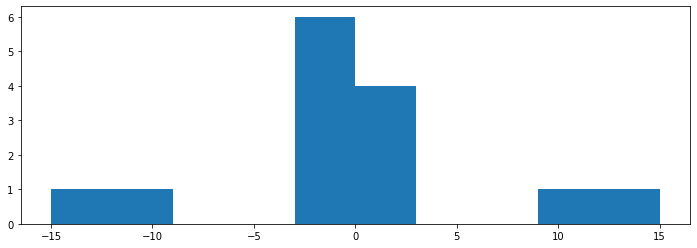

In [132]:
plt.figure(figsize=(12, 4))

plt.hist(values)

{'boxes': [<matplotlib.lines.Line2D at 0x7f82c363b850>],
 'caps': [<matplotlib.lines.Line2D at 0x7f82c35faa90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f82c3622dd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f82c35faed0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f82c35c84d0>,
  <matplotlib.lines.Line2D at 0x7f82c35c8750>]}

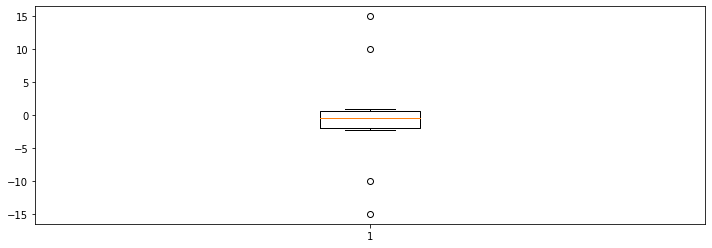

In [133]:
plt.figure(figsize=(12, 4))

plt.boxplot(values)

## **Real Example**

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [136]:
df = pd.read_csv(
    '/content/btc-eth-prices-outliers.csv',
    index_col=0,
    parse_dates=True
)

In [137]:
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


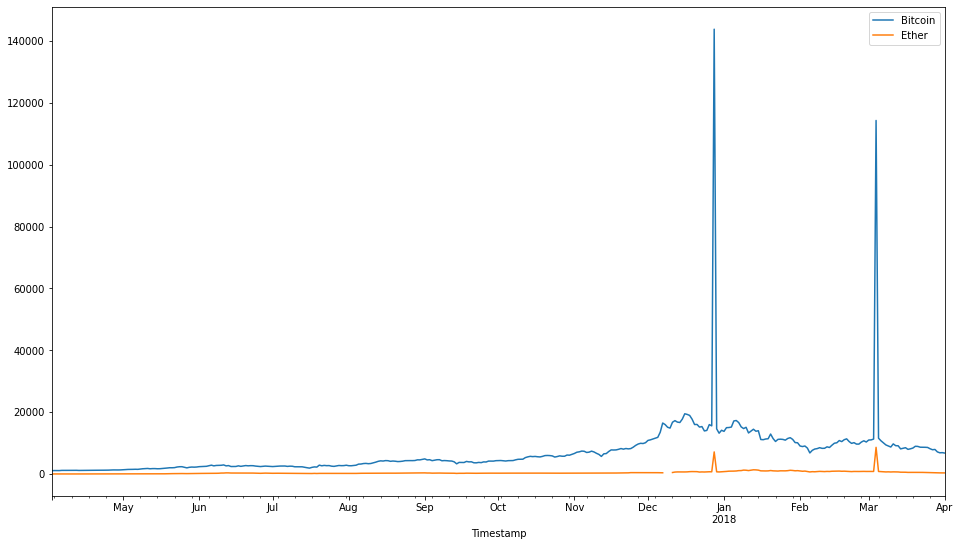

In [138]:
df.plot(figsize=(16, 9))

There are clearly some invalid values, both ETH and BTC have huge spikes. On top of that, there seems to be some data missing in Ether between December 2017 and and January 2018

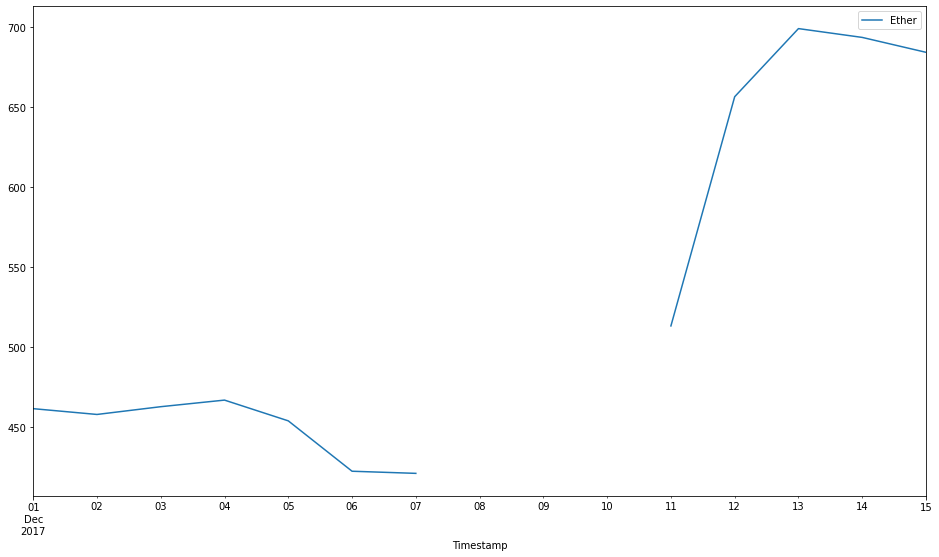

In [139]:
df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(16, 9))

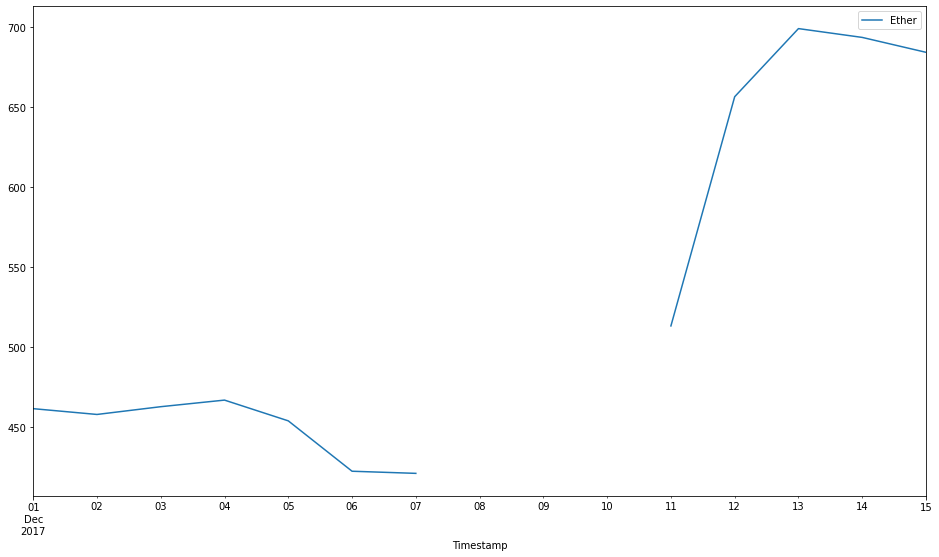

In [140]:
df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(16, 9))

In [141]:
df_na = df.loc['2017-12': '2017-12-15']

In [142]:
df_na['Ether'].isna().values.any()

True

In [143]:
df_na.loc[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [144]:
df.loc['2017-12-06': '2017-12-12']

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


We now need to decide what we'll do with the missing values. Drop them? fill them? If we decide to fill them, what will be use as fill value? For example: we can use the previous value and just assume the price stayed the same.

In [145]:
df.loc['2017-12-06': '2017-12-12'].fillna(method='bfill')

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [146]:
df.fillna(method='bfill', inplace=True)

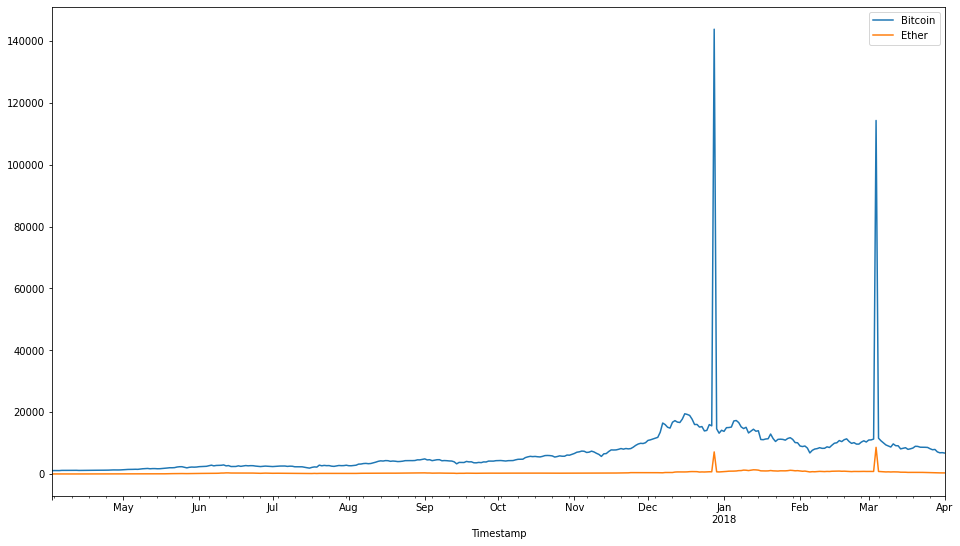

In [147]:
df.plot(figsize=(16, 9))

Much better. We now need to fix the huge spikes. The first step is identifying them. How can we do it? The simple answer is of course visually. They seem to be located in the last 10 days of Dec 2017 and first of March 2018.

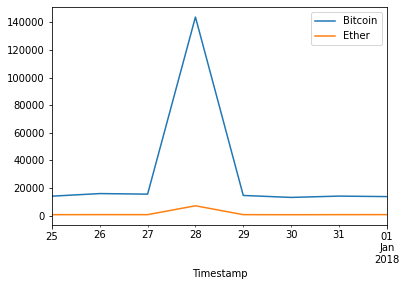

In [148]:
df['2017-12-25':'2018-01-01'].plot()

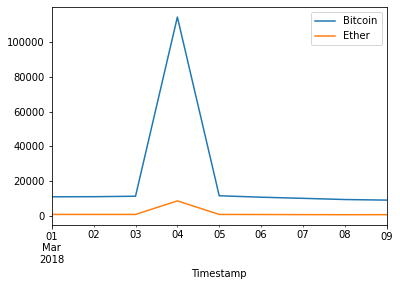

In [149]:
df['2018-03-01': '2018-03-09'].plot()

Apparently, they're located in '2017-12-28' and '2018-03-04'

In [150]:
df_cleaned = df.drop(pd.to_datetime(['2017-12-28', '2018-03-04']))

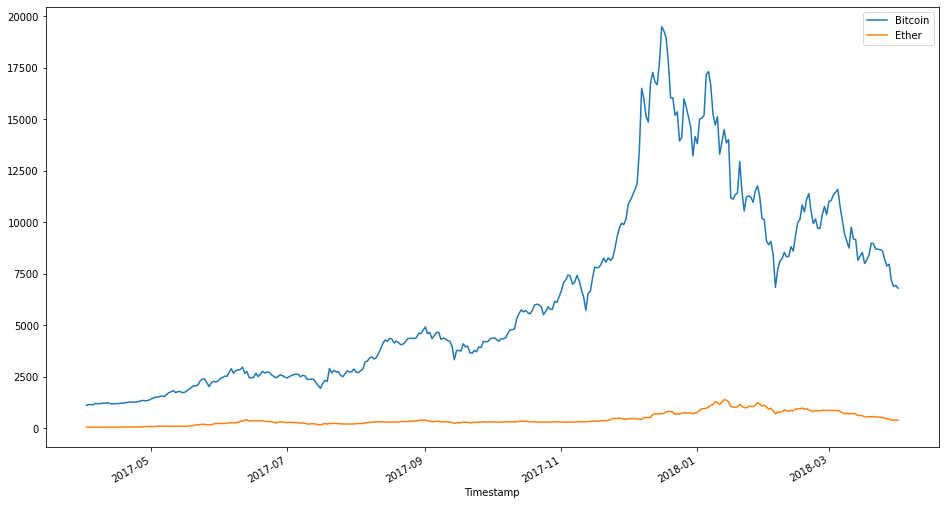

In [151]:
df_cleaned.plot(figsize=(16, 9))

### Cleaning Analysis
- Visualizations helps make sense of the data and let us judge if our analysis and work is on the right track. But we need a more powerful method to handle our data. That's what we call "analysis". We'll use analytical methods to identify these outliers or these skewed values.

### Central Tendency
- We'll use a set of common indicators of to measure central tendency and identify these outliers:



**Mean:**
- The mean is probably the most common and popular one. The problem is that it's really sensitive to outliers. The mean of our dataset with invalid values is:

In [152]:
df.mean()

Bitcoin    6996.004022
Ether       469.609068
dtype: float64

In [153]:
df_cleaned.mean()

Bitcoin    6323.509186
Ether       428.628402
dtype: float64

**Median:**

In [154]:
df.median()

Bitcoin    4594.98785
Ether       309.49000
dtype: float64

**Mode:**

- It doesn't make much sense to measure the mode, as we have continuous values. But you can do it just with df.mode().

### Visualizing distribution:

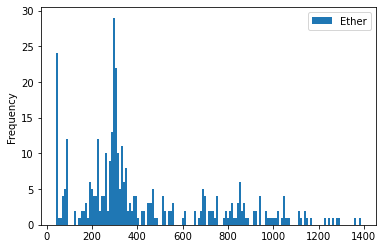

In [155]:
df_cleaned.plot(kind='hist', y='Ether', bins=150)

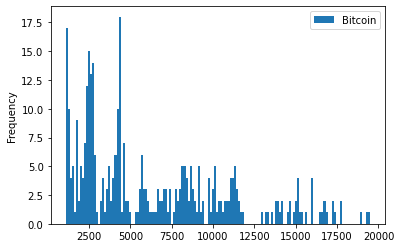

In [156]:
df_cleaned.plot(kind='hist', y='Bitcoin', bins=150)

Using Seaborn:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


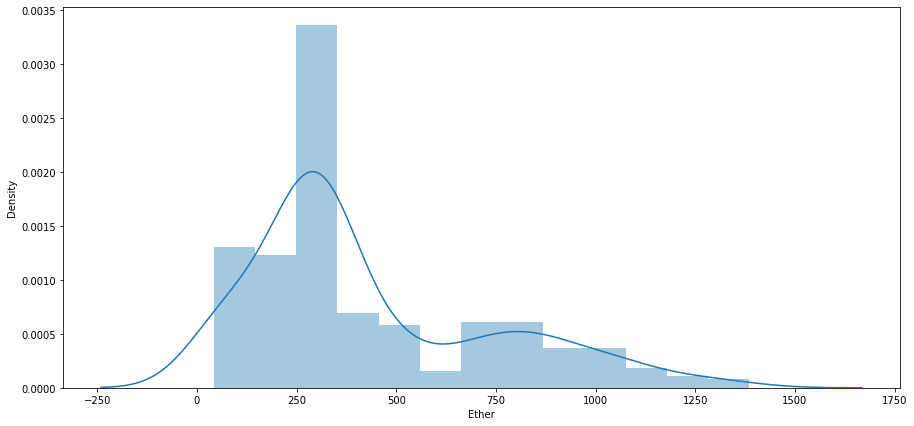

In [157]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Ether'], ax=ax)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


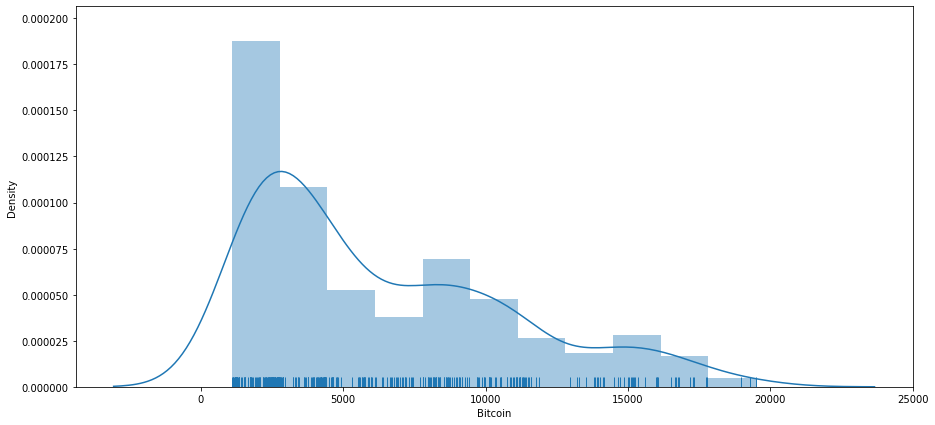

In [158]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], rug=True, ax=ax)

Seaborn's distplot is a general method that will plot a histogram, a KDE and a rugplot. You can also use them as separate.

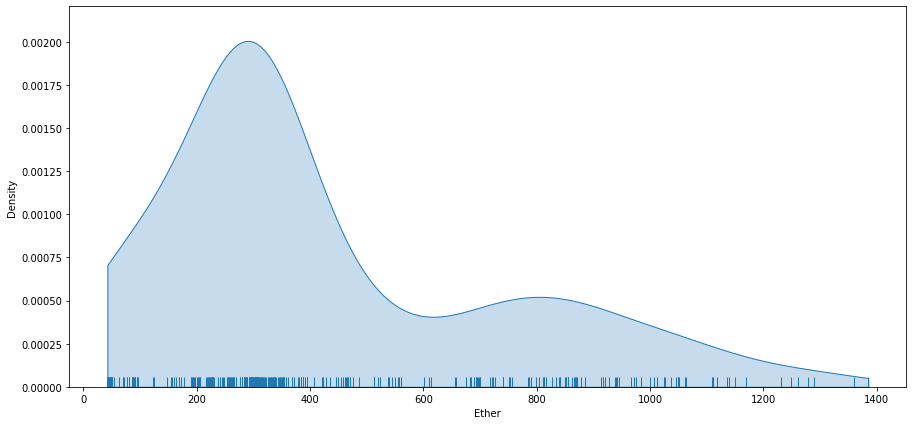

In [159]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.kdeplot(df_cleaned['Ether'], shade=True, cut=0, ax=ax)
sns.rugplot(df_cleaned['Ether'], ax=ax);


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


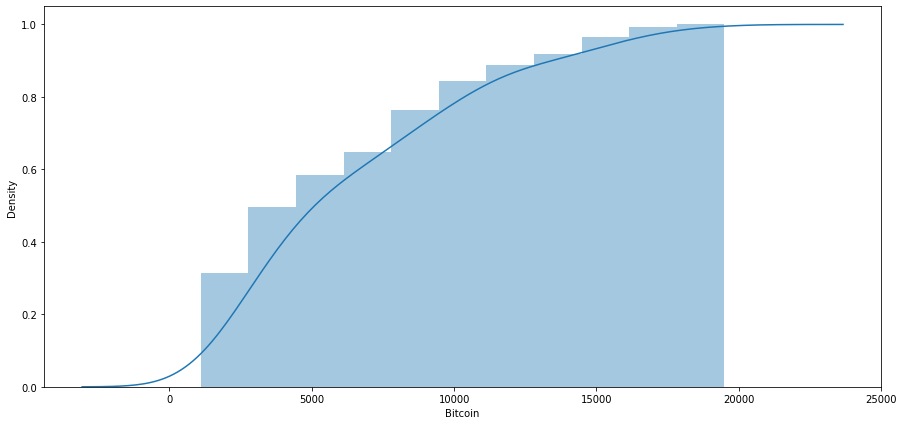

In [160]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

This plot shows how many samples fall behind a certain value. We can increase the number of bins in order to have more detail:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


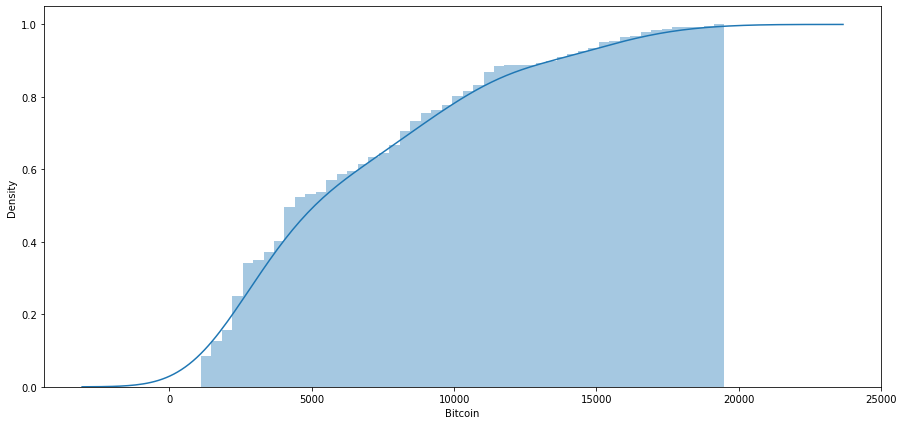

In [161]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

### Visualizing bivariate distributions
 - The most common way to observe a bivariate distribution is a scatterplot, the jointplot will also include the distribution of the variables:

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


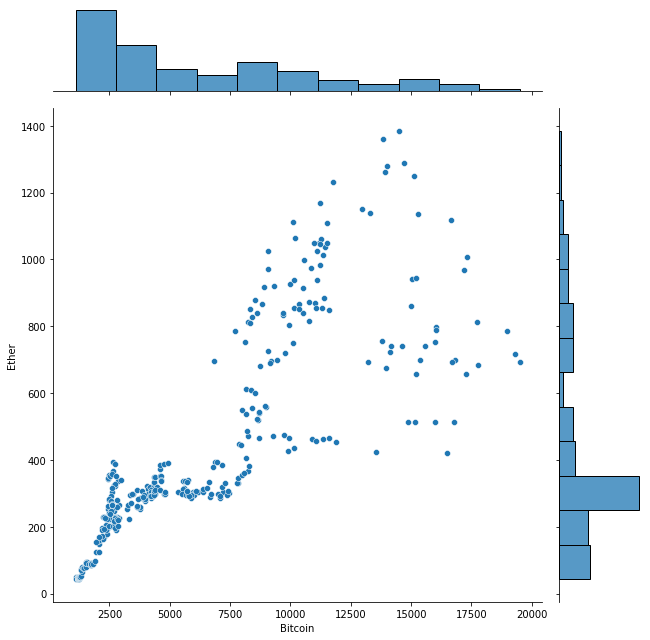

In [162]:
sns.jointplot(x="Bitcoin", y="Ether", data=df_cleaned, size=9)

If you want only a scatter plot, you can use the regplot method, that also fits a linear regression model in the plot:

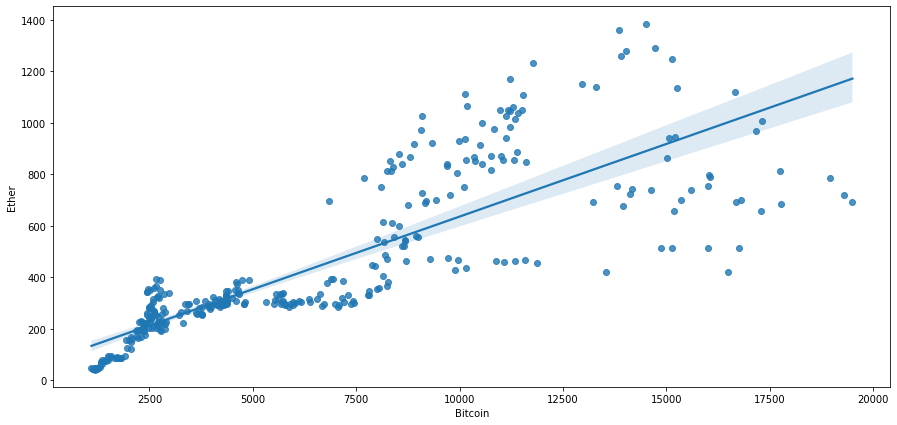

In [163]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x="Bitcoin", y="Ether", data=df_cleaned, ax=ax)

### Quantiles, quartiles and percentiles

In [164]:
df_cleaned['Bitcoin'].quantile(.2)

2438.8627342857144

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


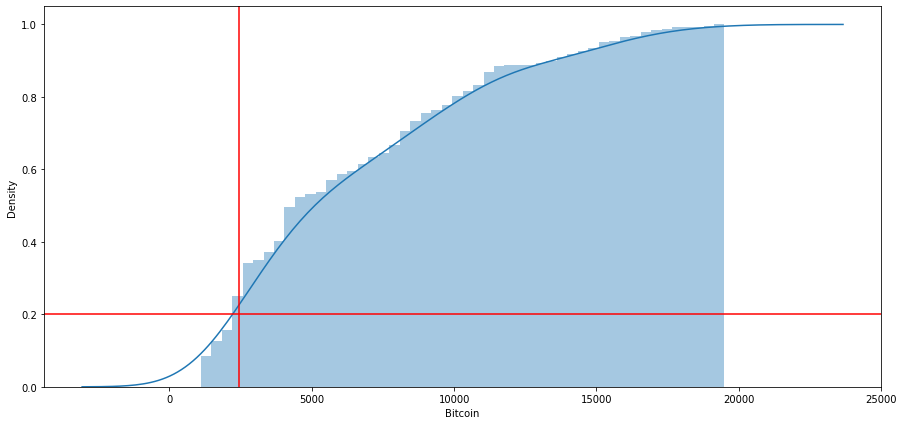

In [165]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.2, color='red')
ax.axvline(df_cleaned['Bitcoin'].quantile(.2), color='red')

In [166]:
df_cleaned['Bitcoin'].quantile(.5)

4580.387479999999

In [167]:
df_cleaned['Bitcoin'].median()

4580.387479999999

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


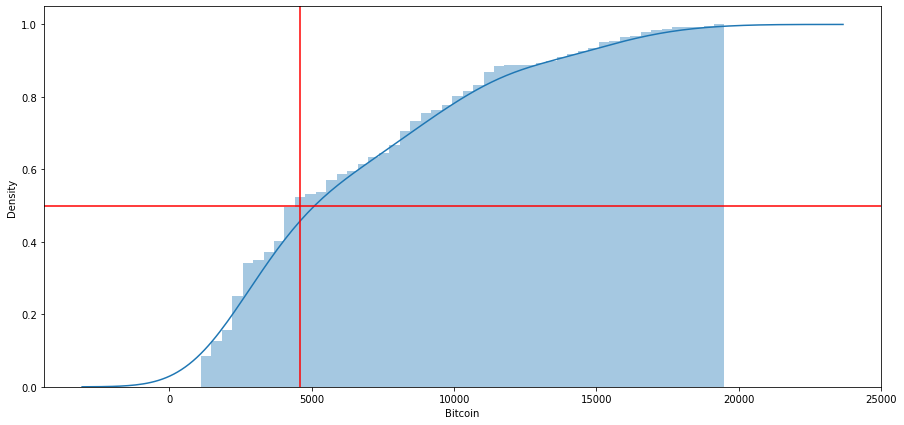

In [168]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.5, color='red')
ax.axvline(df_cleaned['Bitcoin'].quantile(.5), color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


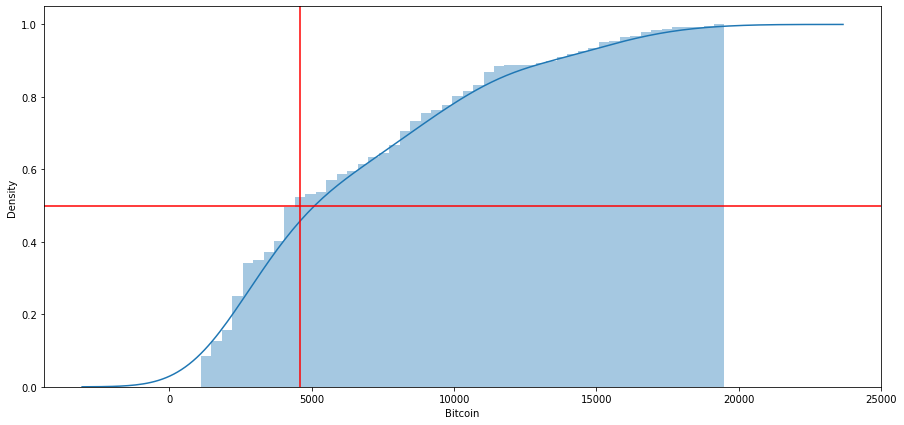

In [169]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.5, color='red')
ax.axvline(df_cleaned['Bitcoin'].median(), color='red')

Quantile 0.25 == Percentile 25% == Quartile 1st

### Dispersion
- We'll use a few methods to measure dispersion in our dataset, most of them well known:

    - Range
    - Variance and Standard Deviation
    - IQR

**Range:**
- Range is fairly simple to understand, it's just the max - min values:

In [170]:
df['Bitcoin'].max() - df['Bitcoin'].min()

142706.6475416667

- Range is really sensitive to outliers. As you can see, the range value is extremely high (might indicate the presence of outliers / invalid values).

In [171]:
df_cleaned['Bitcoin'].max() - df_cleaned['Bitcoin'].min()

18399.51420833333

- This value now makes a lot more sense. We know that Bitcoin had a high in about 20k, and it was around 900 when we started measuring. It makes more sense now.

Variance and Standard Deviation:

In [173]:
df['Bitcoin'].var()

103766537.75278114

In [174]:
df['Bitcoin'].std()

10186.586167739471

- Both variance and std are sensible to outliers as well. We can check with our cleaned dataset.

In [175]:
df_cleaned['Bitcoin'].std()

4513.757662530282

### IQR
- The Interquartile range is a good measure of "centered" dispersion, and is calculated as Q3 - Q1 (3rd quartile - 1st quartile).

In [176]:
df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)

6597.494147619047

In [177]:
df_cleaned['Bitcoin'].quantile(.75) - df_cleaned['Bitcoin'].quantile(.25)

6548.249242559523

As you can see, IQR is more robust than std or range, because it's not so sensitive to outliers.

### Analytical Analysis of invalid values
   - We can now use the measurements we've seen to analyze those values that seem invalid.

- Using std: Z scores
   - We can now define those values that are a couple of Z scores above or below the mean (or the max/min value). Example:

In [178]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()
lower_limit = df['Bitcoin'].mean() - 2 * df['Bitcoin'].std()

In [179]:
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 27369.17635730168
Lower Limit: -13377.168313656206


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


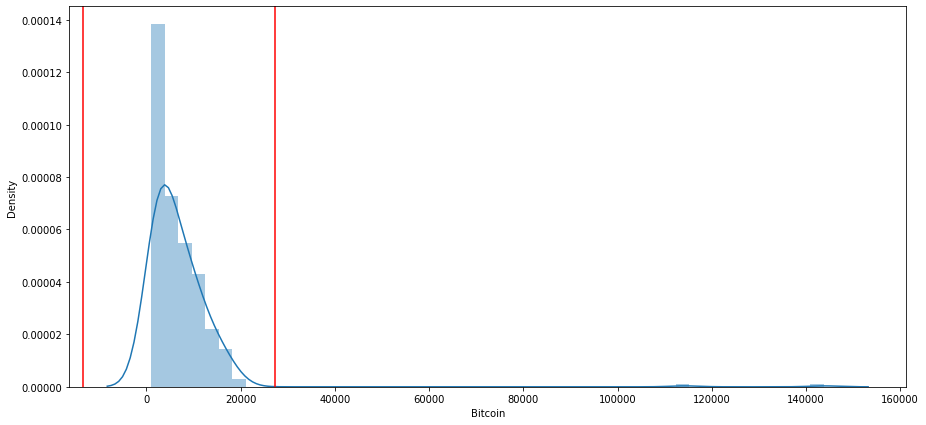

In [180]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

Seems like this is a good measurement. Our lower limit doesn't make a lot of sense, as negative values are invalid. But our upper limit has a really good measure. Anything above $27,369 is considered to be an invalid value. Pretty accurate.

Using IQRs:
- We can use the IQR instead of std if we think that the standard deviation might be too affected by the outliers/invalid values.

In [181]:
iqr = df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)
iqr

6597.494147619047

In [182]:
upper_limit = df['Bitcoin'].mean() + 2 * iqr
lower_limit = df['Bitcoin'].mean() - 2 * iqr

In [183]:
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 20190.99231706083
Lower Limit: -6198.984273415356


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


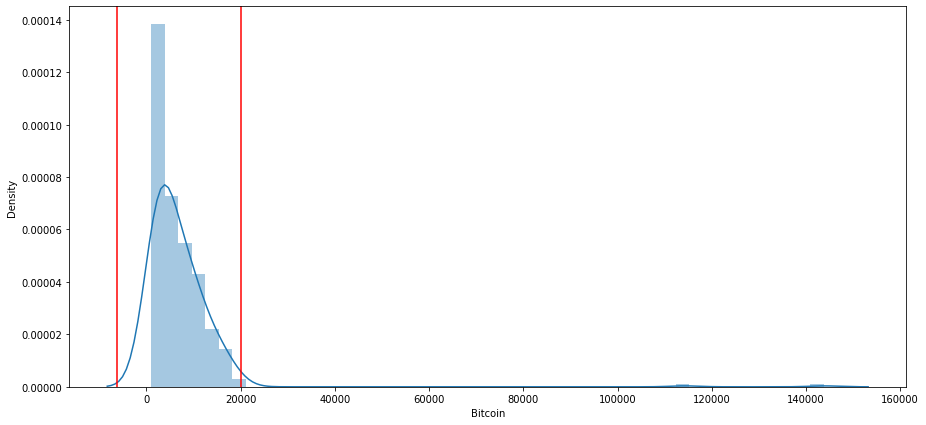

In [184]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

Our measurement now is a little bit less precise. There are a few valid values (20k) that seem to be above our upper limit. Regardless, it's still a good indicator.

### Cleaning invalid values analytically
- It's time now to remove these invalid values analytically, we'll use the upper limit defined by standard deviation:

In [185]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()

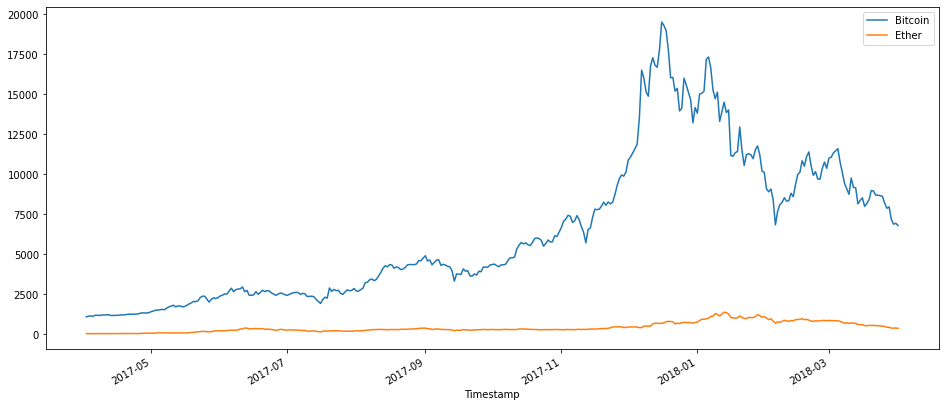

In [186]:
df[df['Bitcoin'] < upper_limit].plot(figsize=(16, 7))

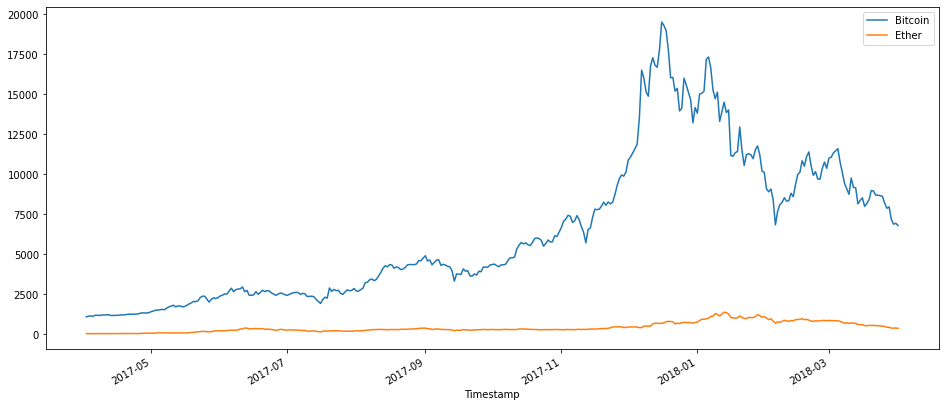

In [187]:
df.drop(df[df['Bitcoin'] > upper_limit].index).plot(figsize=(16, 7))